In [1]:
from jax import vmap, jit, config
import jax.numpy as jnp
import jax.scipy.stats as jst
import matplotlib.pyplot as plt
from functools import partial 
import matplotlib.pyplot as plt 
config.update("jax_enable_x64", True)

def X_plus_Y_given_n(r: int, n: int):
    vectorize = lambda func: jit(vmap(func))
    poisson = jst.poisson.pmf

    def condition(mu1, mu2):
        sum_over_r = jnp.arange(0, n + 1)
        calc = lambda r: poisson(k=r, mu=mu1) * poisson(k=n - r, mu=mu2)
        return vectorize(calc)(sum_over_r)

    def joint(mu1, mu2):
        return poisson(k=r, mu=mu1) * poisson(k=n - r, mu=mu2)

    def process(mu1, mu2):
        return joint(mu1, mu2) / jnp.sum(condition(mu1, mu2))

    return (process)


In [2]:
n= 50
states =jnp.array( [(r , n) for r in range (0,n+1)])

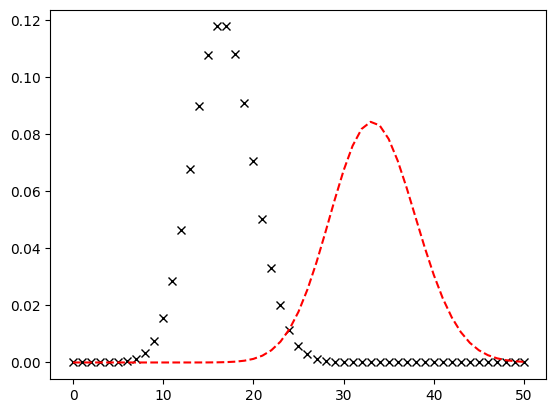

In [3]:
Xs= list (X_plus_Y_given_n(*state) for state in states )
res = list (expermient(1,2) for expermient in  Xs)
k = jnp.arange (0 , n+1 )
binom = jst.binom.pmf (p = 1/3 , k = k , n=100)
plt.plot (k ,res , "kx" )
plt.plot (k ,binom , "r--"  )

In [65]:
sum (res)

Array(1., dtype=float64)

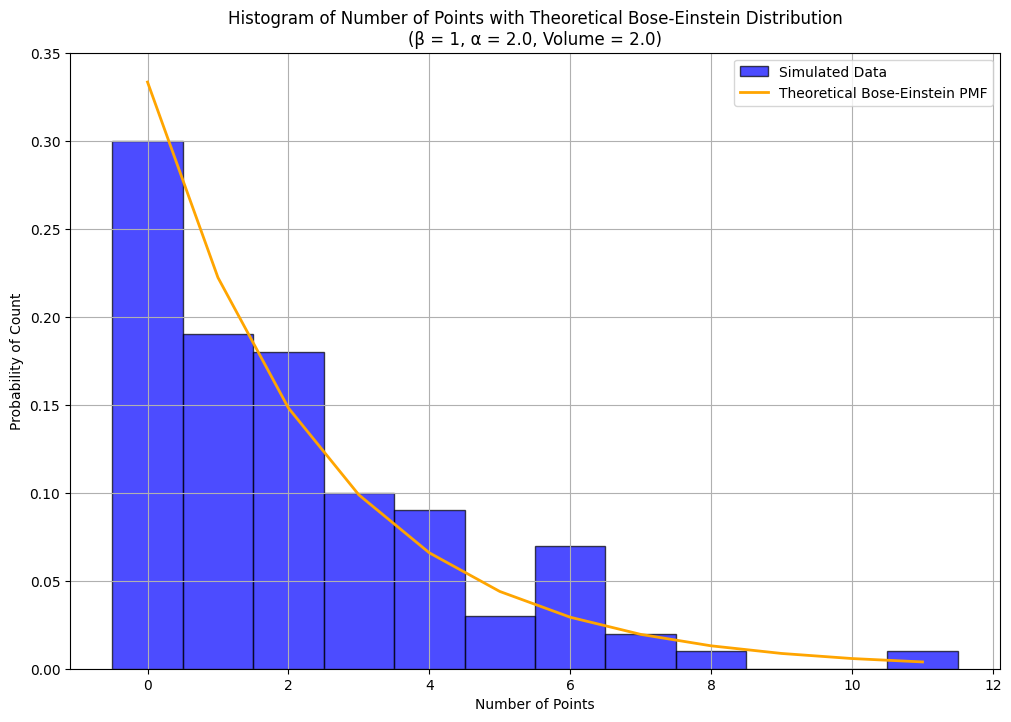

In [204]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
beta = 1 
I = 1000 # hyperparameter controlling the mean of the exponential distribution
Lx, Ly = 1, 1  # dimensions of the region
T = 0.002  # time duration in seconds
num_simulations = 100  # number of repetitions

# Calculate the expected number of points
alpha = Lx * Ly * T *I # area * time

# Store the number of points for each simulation
num_points_list = []

for _ in range(num_simulations):
    # Generate the rate parameter from an exponential distribution
    lambda_rate = np.random.exponential(beta)
    
    # Calculate the expected number of points
    expected_points = lambda_rate * alpha
    
    # Generate the number of points from a Poisson distribution with this rate
    num_points = np.random.poisson(expected_points)
    
    # Store the number of points
    num_points_list.append(num_points)

# Calculate the theoretical Bose-Einstein distribution
p = 1 / (1 + alpha * beta)
k_values = np.arange(0, max(num_points_list) + 1)
bose_einstein_pmf = (alpha * beta / (1 + alpha * beta)) ** k_values * p

# Plot the histogram of the number of points
plt.figure(figsize=(12, 8))
count, bins, ignored = plt.hist(num_points_list, bins=np.arange(min(num_points_list) - 0.5, max(num_points_list) + 1.5, 1), color='blue', edgecolor='black', alpha=0.7, density=True, label='Simulated Data')

# Plot the theoretical Bose-Einstein distribution
plt.plot(k_values, bose_einstein_pmf, 'orange', lw=2, label='Theoretical Bose-Einstein PMF')

# Add titles, labels, and legend
plt.title(f'Histogram of Number of Points with Theoretical Bose-Einstein Distribution\n(β = {beta}, α = {alpha}, Volume = {alpha})')
plt.xlabel('Number of Points')
plt.ylabel('Probability of Count')
plt.legend()
plt.grid(True)
plt.show()


In [180]:
import matplotlib.pyplot as plt 
from jax import (
    numpy as jnp,
    random as rnd,
    vmap , jit ,
    config
)
config.update (name = "jax_enable_x64" , val=True)

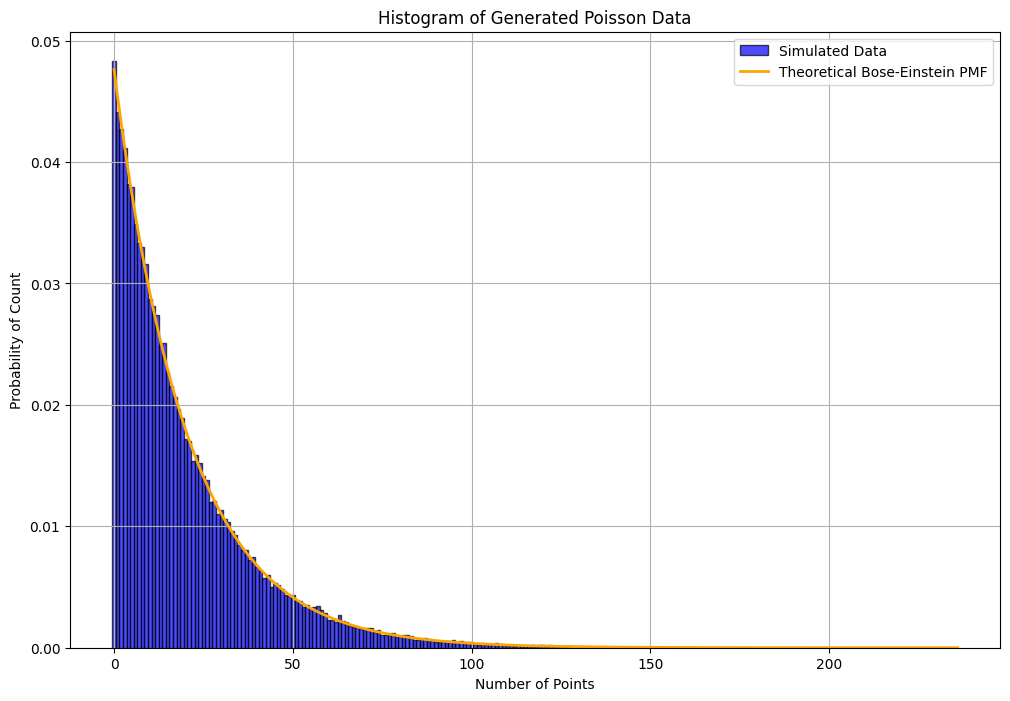

In [216]:
import matplotlib.pyplot as plt
from jax import (
    numpy as jnp,
    random as rnd,
    vmap, jit,
    config
)

config.update("jax_enable_x64", True)

# Initialize parameters
Key = rnd.PRNGKey(2)
I0 = 1000
A = 1
T = 0.02
alpha = I0 * A * T
beta = 1

def generate(alpha, beta, Key, N):
    lambd = beta * rnd.exponential(key=Key, shape=(N,))
    return rnd.poisson(key=Key, lam=alpha * lambd)

X = generate(alpha, beta, Key, 70000)

# Plot the histogram
plt.figure(figsize=(12, 8))
count, bins, ignored = plt.hist(X, bins=np.arange(min(X) - 0.5, max(X) + 1.5, 1), color='blue', edgecolor='black', alpha=0.7, density=True, label='Simulated Data')
plt.plot(k_values, bose_einstein_pmf, 'orange', lw=2, label='Theoretical Bose-Einstein PMF')

p = 1 / (1 + alpha * beta)
k_values = np.arange(0, max(X) + 1)
bose_einstein_pmf = (alpha * beta / (1 + alpha * beta)) ** k_values * p
# Add title and labels
plt.title('Histogram of Generated Poisson Data')
plt.xlabel('Number of Points')
plt.ylabel('Probability of Count')

# Add grid and legend
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


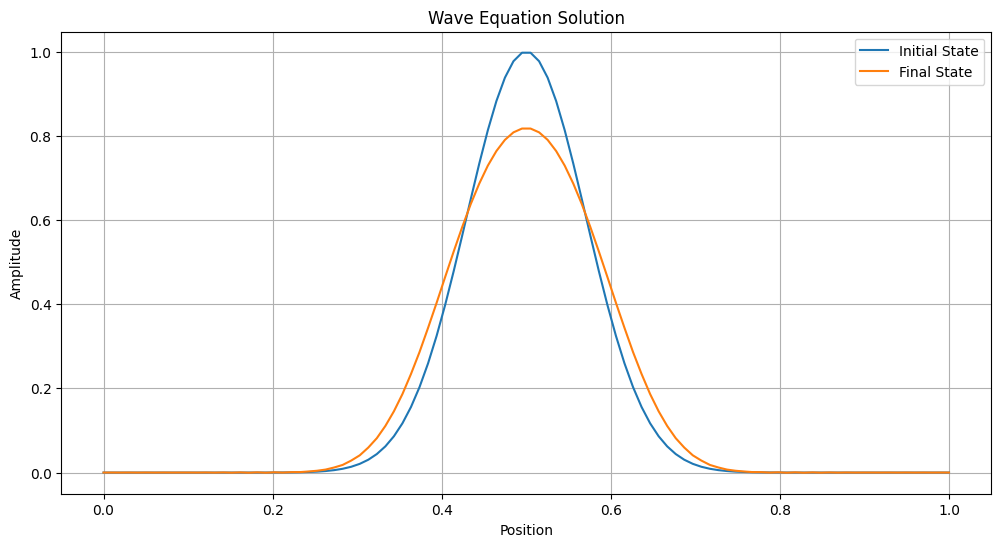

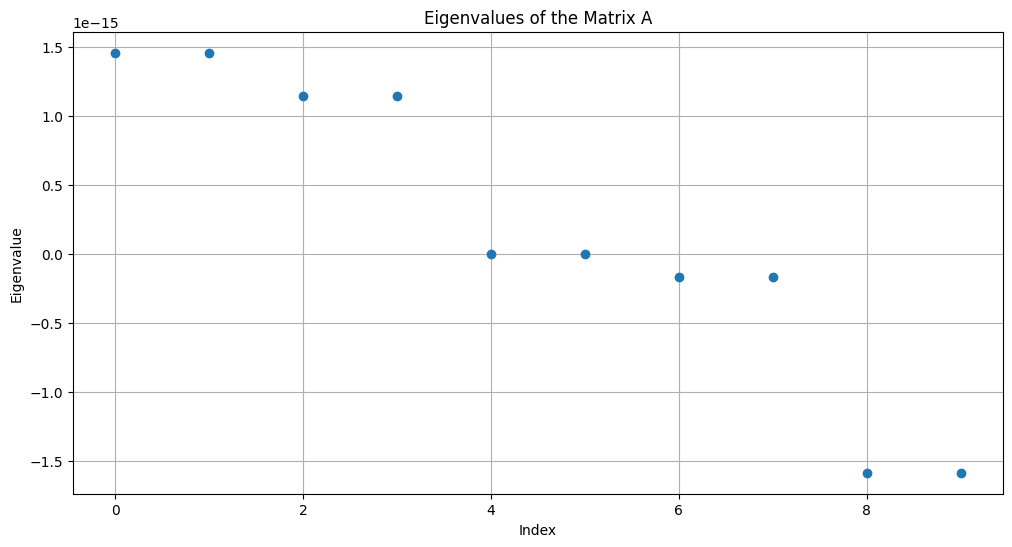

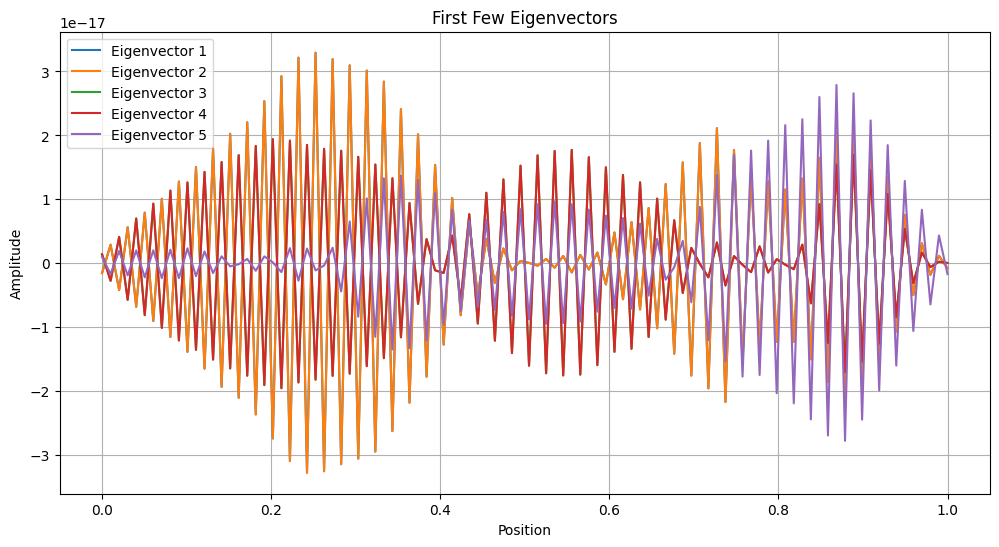

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
from scipy.integrate import solve_ivp

# Parameters
L = 1.0  # Length of the domain
N = 100  # Number of spatial points
v = 1.0  # Wave speed
dx = L / (N - 1)  # Spatial step size

# Discretize the second spatial derivative using a finite difference method
D = (np.diag(np.ones(N-1), 1) - 2 * np.diag(np.ones(N), 0) + np.diag(np.ones(N-1), -1)) / dx**2

# Construct the block matrix A
A_top = np.hstack((np.zeros((N, N)), np.eye(N)))
A_bottom = np.hstack((v**2 * D, np.zeros((N, N))))
A = np.vstack((A_top, A_bottom))

# Define the initial condition
u0 = np.exp(-100 * (np.linspace(0, L, N) - 0.5)**2)  # Gaussian initial condition
w0 = np.zeros(N)  # Initial velocity is zero
y0 = np.hstack((u0, w0))  # Combine into a single state vector

# Define the system of ODEs
def wave_eq(t, y):
    return A @ y

# Solve the system of ODEs using solve_ivp
t_span = (0, 2)  # Time interval
t_eval = np.linspace(0, 2, 500)  # Time points to evaluate the solution

solution = solve_ivp(wave_eq, t_span, y0, t_eval=t_eval, method='RK45')

# Extract the solution
u_sol = solution.y[:N, :]  # Displacement part of the solution

# Plot the initial and final states
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(0, L, N), u_sol[:, 0], label='Initial State')
plt.plot(np.linspace(0, L, N), u_sol[:, -1], label='Final State')
plt.xlabel('Position')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Wave Equation Solution')
plt.grid(True)
plt.show()

# Compute eigenvalues and eigenvectors of A
eigenvalues, eigenvectors = eig(A)

# Plot the first few eigenvalues
plt.figure(figsize=(12, 6))
plt.plot(np.real(eigenvalues[:10]), 'o')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of the Matrix A')
plt.grid(True)
plt.show()

# Plot the first few eigenvectors
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.plot(np.linspace(0, L, N), np.real(eigenvectors[:N, i]), label=f'Eigenvector {i+1}')
plt.xlabel('Position')
plt.ylabel('Amplitude')
plt.title('First Few Eigenvectors')
plt.legend()
plt.grid(True)
plt.show()
